# Print a simplified ETL layout from python

Printing to scale on stack exchange: https://stackoverflow.com/questions/29400116/using-matplotlib-how-can-i-print-something-actual-size

In [2]:
import matplotlib.pyplot as plt


## Simple example

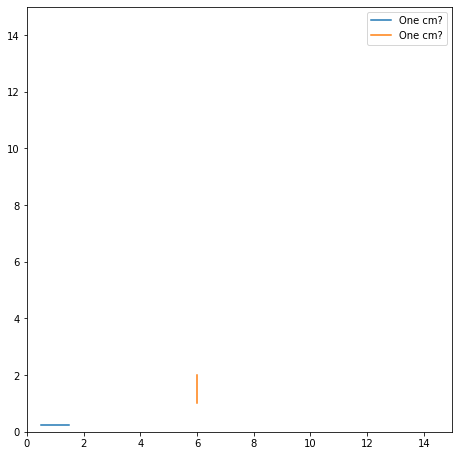

In [3]:
left_margin = 1.   # cm
right_margin = 1.  # cm
figure_width = 15. # cm
figure_height = 15. # cm
top_margin = 1.    # cm
bottom_margin = 1. # cm

box_width = left_margin + figure_width + right_margin   # cm
box_height = top_margin + figure_height + bottom_margin # cm

cm2inch = 1/2.54 # inch per cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(box_width*cm2inch,box_height*cm2inch))
ax = fig.add_subplot(111)
#ax.plot([1,2,3])

ax.set_ylim(0,15)
ax.set_xlim(0,15)

ax.plot([0.5, 1.5],[0.25, 0.25],label='One cm?')
ax.plot([6,6],[1,2], label='One cm?')
ax.legend()

fig.subplots_adjust(left   = left_margin / box_width,
                    bottom = bottom_margin / box_height,
                    right  = 1. - right_margin / box_width,
                    top    = 1. - top_margin   / box_height,
                    )
fig.savefig('ten_x_seven_cm.png', dpi=128)
# dpi = 128 is what works in my display for matching the designed dimensions.

## ETL single SH

In [4]:
%reload_ext autoreload
%autoreload 2

from ETL import *;

In [5]:
sensor_x = 2.14
sensor_y = 2.16
module_x = 4.310
module_y = 5.750

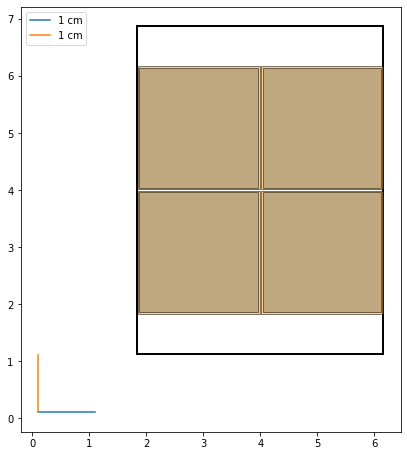

In [6]:

s = Sensor(sensor_x, sensor_y,deadspace=0.03)  # 3 sides of 0.3mm, 1 side of 0.5mm
m = Module(module_x, module_y, n_sensor_x=2, n_sensor_y=2, sensor_distance_y=sensor_y+0.02, sensor_distance_x=sensor_x+0.02)
# this module is now 1mm larger in y

left_margin = 1.   # cm
right_margin = 1.  # cm
figure_width = 15. # cm
figure_height = 15. # cm
top_margin = 1.    # cm
bottom_margin = 1. # cm

box_width = left_margin + figure_width + right_margin   # cm
box_height = top_margin + figure_height + bottom_margin # cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(box_width*cm2inch,box_height*cm2inch))
ax = fig.add_subplot(111)
#ax.plot([1,2,3])

m.populate(s)

m.move_by(4,4)

plt.rcParams['figure.figsize'] = [15, 15]

pm = m.getPolygon()
plt.gca().add_patch(pm)

for sen in m.sensors:
    plt.gca().add_patch(sen.getPolygon())
    plt.gca().add_patch(sen.getPolygon(active=True))


ax.set_ylim(0,15)
ax.set_xlim(0,15)

ax.plot([0.1,1.1],[0.1,0.1],label='1 cm')
ax.plot([0.1,0.1],[0.1,1.1], label='1 cm')
ax.legend()

fig.subplots_adjust(left   = left_margin / box_width,
                    bottom = bottom_margin / box_height,
                    right  = 1. - right_margin / box_width,
                    top    = 1. - top_margin   / box_height,
                    )

fig.savefig('module_scale.png', dpi=300)
fig.savefig('module_scale.pdf', dpi=500)

plt.axis('scaled')
plt.show()

# Supermodule

In [7]:
s = Sensor(sensor_x, sensor_y,deadspace=0.03)  # 3 sides of 0.3mm, 1 side of 0.5mm
m = Module(4.310, 5.750, n_sensor_x=2, n_sensor_y=2, sensor_distance_y=sensor_y+0.02, sensor_distance_x=sensor_x+0.02)
# this module is now 1mm larger in y
detector = {}
edge_x = 6  # 6mm is the default

detector = {}
r_inner = 31.5
r_outer = 118.5

m.populate(s) #put sensors on module
module_gap = .05
rb = ReadoutBoard(1, module_y, color='green')
pb = ReadoutBoard(1, 2.95, color='red')

SM = SuperModule(m, pb, rb, n_modules=3, module_gap=module_gap, orientation='above', cm=True)


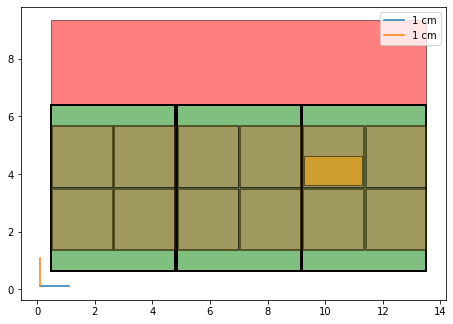

In [8]:
left_margin = 1.   # cm
right_margin = 1.  # cm
figure_width = 15. # cm
figure_height = 15. # cm
top_margin = 1.    # cm
bottom_margin = 1. # cm

box_width = left_margin + figure_width + right_margin   # cm
box_height = top_margin + figure_height + bottom_margin # cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(box_width*cm2inch,box_height*cm2inch))
ax = fig.add_subplot(111)

plt.rcParams['figure.figsize'] = [15, 15]

SM.move_by(7,5)

plt.gca().add_patch(SM.PB.getPolygon())
plt.gca().add_patch(SM.RB.getPolygon())

for mod in SM.modules:
    plt.gca().add_patch(mod.getPolygon())
    for sen in mod.sensors:
        plt.gca().add_patch(sen.getPolygon())
        plt.gca().add_patch(sen.getPolygon(active=True))

plt.gca().add_patch(SM.VTRX.getPolygon())
        
ax.set_ylim(0,15)
ax.set_xlim(0,15)

ax.plot([0.1,1.1],[0.1,0.1],label='1 cm')
ax.plot([0.1,0.1],[0.1,1.1], label='1 cm')
ax.legend()

fig.subplots_adjust(left   = left_margin / box_width,
                    bottom = bottom_margin / box_height,
                    right  = 1. - right_margin / box_width,
                    top    = 1. - top_margin   / box_height,
                    )

fig.savefig('supermodule_scale.png', dpi=300)
fig.savefig('supermodule_scale.pdf', dpi=500)

plt.axis('scaled')
plt.show()


# Full detector

In [9]:
from yaml import load, dump
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper

with open('layouts/database_new.yaml') as f:
    database_new = load(f, Loader=Loader)

disk_new = database_new['new']

In [10]:
new_layout = {}

new_layout['D1'] = Dee(315, 1185)
new_layout['D1'].fromCenters(disk_new['disk1']['front'], s, cm=True)

new_layout['D2'] = Dee(315, 1185)
new_layout['D2'].fromCenters(disk_new['disk1']['back'], s, cm=True)

new_layout['D3'] = Dee(315, 1185)
new_layout['D3'].fromCenters(disk_new['disk2']['front'], s, cm=True)

new_layout['D4'] = Dee(315, 1185)
new_layout['D4'].fromCenters(disk_new['disk2']['back'], s, cm=True)

In [11]:
d = new_layout['D2']

x_centers = [ sens.x for sens in d.sensors ]
y_centers = []
for i, sens in enumerate(d.sensors):
    if sens.x>0:
        y_centers.append(sens.y)

y_positions_individual = set(y_centers)

y_counts = []
for y in reversed(sorted(y_positions_individual)):
    y_counts.append((y, int(y_centers.count(y))))
    
count_vector = y_counts[::2]

partitions = []
for module_count in count_vector:
    partitions.append((module_count[0], getPartition(module_count[1], flavors=[3,6,7])))

mod_partitions = []

for part in partitions:
    if abs(part[0])<500:
        if part[1][-1] == 6:
            new_part = part[1][:-1] + [3,3]
        else:
            new_part = part[1]
    else:
        new_part = part[1]
    if len(new_part)>0:
        mod_partitions.append((part[0], len(new_part), new_part))

In [12]:
modify_partitions = True  # This switches on/off the forced short RBs at the center

n_readout_boards = {3:0, 6:0, 7:0}
n_modules = 0

faces = ['D1']

for face in faces:
    y_centers = []
    for i, sens in enumerate(d.sensors):
        if sens.x>0:
            y_centers.append(sens.y)
        y_positions_individual = set(y_centers)
    y_counts = []
    for y in reversed(sorted(y_positions_individual)):
        y_counts.append((y, int(y_centers.count(y))))

    count_vector = y_counts[::2]
    partitions = []
    for module_count in count_vector:
        #print (module_count)
        n_modules += module_count[1]
        partitions.append((module_count[0], getPartition(module_count[1], flavors=[3,6,7])))
        
    mod_partitions = []

    for part in partitions:
        
        if abs(part[0])<50.0 and modify_partitions:
            if part[1][-1] == 6:
                new_part = part[1][:-1] + [3,3]
            elif part[1][-2] == 6 and part[1][-1] == 3 and abs(part[0])>40.0:
                new_part = part[1][:-2] + [3,3,3]
            else:
                new_part = part[1]
        else:
            new_part = part[1]
        if len(new_part)>0:
            mod_partitions.append((part[0], len(new_part), new_part))
            n_readout_boards[3] += new_part.count(3)*4  # multiply with 4 for full face (mirrored) + second endcap
            n_readout_boards[6] += new_part.count(6)*4
            n_readout_boards[7] += new_part.count(7)*4

In [13]:
centers = [ (sens.x, sens.y) for sens in d.sensors if sens.x>0 ]

centers.sort(key=lambda y: y[1], reverse=True)

y_centers = []
for i, sens in enumerate(d.sensors):
    if sens.x>0:
        y_centers.append(sens.y)

#y_centers = [ sens.y for sens in d.sensors ]
y_centers.sort(reverse=True)

y_positions_individual = set(y_centers)
y_positions_individual = list(y_positions_individual)
y_positions_individual.sort(reverse=True)

y_centers_module = (np.array(y_positions_individual[0::2]) + np.array(y_positions_individual[1::2]))/2

x_centers_module = {y:[] for y in y_centers_module}
for x, y in centers:
    if y in y_positions_individual[0::2]:
        i = list(y_positions_individual[0::2]).index(y)
        x_centers_module[y_centers_module[i]].append(x)

In [14]:
for face in ['D2']:
    y_centers = []
    for i, sens in enumerate(d.sensors):
        if sens.x>0:
            y_centers.append(sens.y)
            
    #y_centers = [ sens.y for sens in new_layout[face].sensors ]
    y_positions_individual = set(y_centers)
    y_counts = []
    for y in reversed(sorted(y_positions_individual)):
        if -415>y>-420:
            y_counts.append((y, int(y_centers.count(y))+2))
        else:
            y_counts.append((y, int(y_centers.count(y))))

    count_vector = y_counts[::2]
    partitions = []
    for module_count in count_vector:
        partitions.append((module_count[0], getPartition(module_count[1], flavors=[3,6,7])))
        
    mod_partitions = []

    for part in partitions:
        if abs(part[0])<50.0 and modify_partitions:
            if part[1][-1] == 6:
                new_part = part[1][:-1] + [3,3]
            elif part[1][-2] == 6 and part[1][-1] == 3 and abs(part[0])>40.0:
                new_part = part[1][:-2] + [3,3,3]
            else:
                new_part = part[1]
        else:
            new_part = part[1]
        if len(new_part)>0:
            mod_partitions.append((part[0], len(new_part), new_part))

In [15]:
supermodules = []

for i, y in enumerate(x_centers_module.keys()):
    _, __, partition = mod_partitions[i]
    start = 0
    for n_mod in partition:
        tmp = copy.deepcopy(SuperModule.fromSuperModule(SM, n_modules=n_mod, module_gap=SM.module_gap, orientation=SM.orientation, color=colors[n_mod], cm=True))
        x = sum(x_centers_module[y][start:start+n_mod])/n_mod
        tmp.move_by(x, y+pb.width/2) ## switch between + and - for D1/D2
        start += n_mod
        supermodules.append(tmp)

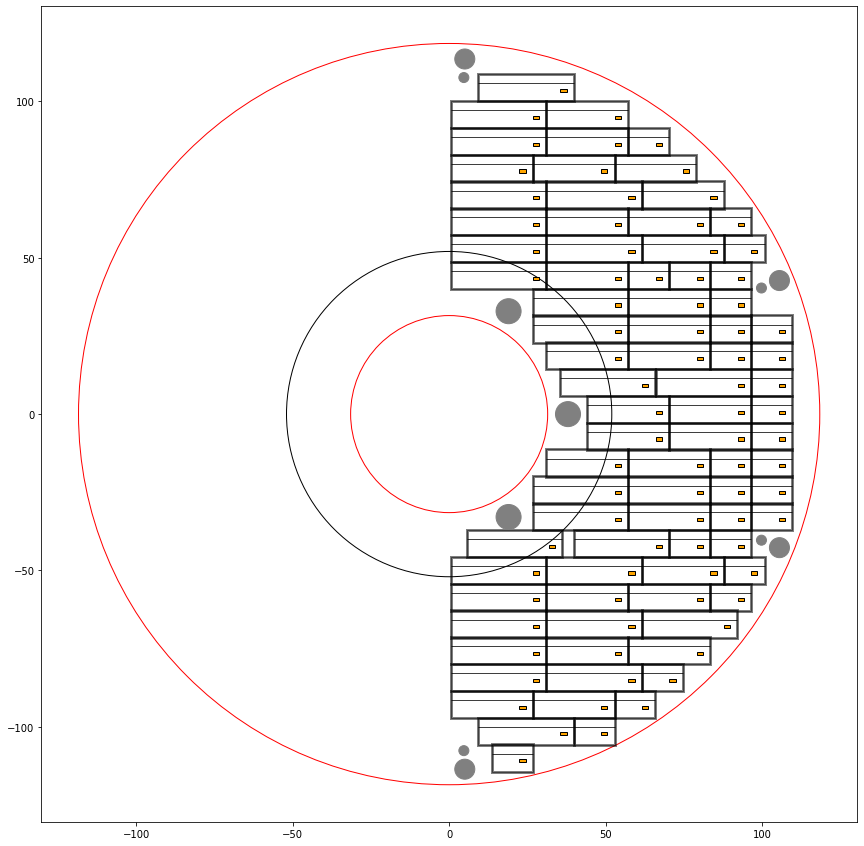

In [16]:
SM = SuperModule(m, pb, rb, n_modules=3, orientation='above')

face = 'D2'

inner = plt.Circle((0, 0), 31.5,fill=None, edgecolor='r')
rad_boarder = plt.Circle((0, 0), 52.0,fill=None, edgecolor='black', linewidth=1)
outer = plt.Circle((0, 0), 118.5,fill=None, edgecolor='r')


plt.rcParams['figure.figsize'] = [15, 15]

plt.gca().add_patch(inner)
plt.gca().add_patch(rad_boarder)
plt.gca().add_patch(outer)

for SM in supermodules:
    plt.gca().add_patch(SM.getPolygon(alpha=0.5, fill=False))
    plt.gca().add_patch(SM.VTRX.getPolygon(alpha=1.0))
    plt.gca().add_patch(SM.PB.getPolygon(fill=False))
    plt.gca().add_patch(SM.RB.getPolygon(fill=False))

if False:
    for dee in [face]:#new_layout:
        for sen in new_layout[dee].sensors:
            plt.gca().add_patch(sen.getPolygon(active=True, alpha=0.5))

holes = []
holes.append(plt.Circle((19.0, -32.9), 4.0,color='gray'))
holes.append(plt.Circle((19.0, 32.9), 4.0,color='gray'))
holes.append(plt.Circle((38.0, 0), 4.0,color='gray'))

holes.append(plt.Circle((5.0, 113.53), 3.2,color='gray'))
holes.append(plt.Circle((4.7, 107.6), 1.6,color='gray'))

holes.append(plt.Circle((5.0, -113.53), 3.2,color='gray'))
holes.append(plt.Circle((4.7, -107.6), 1.6,color='gray'))

holes.append(plt.Circle((99.85, 40.315), 1.6,color='gray'))
holes.append(plt.Circle((105.6, 42.7), 3.2,color='gray'))

holes.append(plt.Circle((99.85, -40.315), 1.6,color='gray'))
holes.append(plt.Circle((105.6, -42.7), 3.2,color='gray'))


for hole in holes:
    plt.gca().add_patch(hole)

    
plt.axis('scaled')
plt.show()